<a href="https://colab.research.google.com/github/lkarjun/Data-Science-from-Scratch/blob/master/ChapterFive/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from typing import List
import pandas as pd
import numpy as np

In [67]:
#random numbers
num_friends = [
    random.choice(range(10)) for _ in range(204)
]

In [68]:
num_points = len(num_friends)

In [69]:
num_points

204

In [70]:
friend_count = Counter(num_friends)

In [71]:
xs = range(101)

In [72]:
ys = [friend_count[x] for x in xs]

Text(0, 0.5, '# of people')

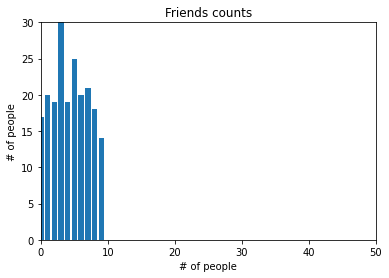

In [73]:
plt.bar(xs, ys)
plt.axis([0,50, 0, 30])
plt.title('Friends counts')
plt.xlabel('# of people')
plt.ylabel('# of people')

In [74]:
#number of points
num_points = len(num_friends)

In [75]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [76]:
sorted_value = sorted(num_friends)
smallestValue = sorted_value[0]
second_smallest_value = sorted_value[1]
second_largest_value = sorted_value[-2]

In [77]:
#central tendencies
#mean (average)
def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

In [78]:
mean(num_friends)

4.357843137254902

In [79]:
from typing import List
#median for odd and even
def _median_odd(xs: List[float]):
    return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint -1]+ sorted_xs[hi_midpoint])/2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [80]:
assert median([1,10,2,9,5]) == 5
assert median ([1,9,2,10]) == (2 + 9) / 2

print('median is:\n',median(num_friends))
print('mean is:\n', mean(num_friends))

median is:
 4.0
mean is:
 4.357843137254902


In [81]:
#quantile 

def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print(quantile(num_friends, 0.10) == 1)
print(quantile(num_friends, 0.25) == 2)
print(quantile(num_friends, 0.75) == 7)

True
True
True


In [82]:
#mode most common values 

def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    print(max_count)
    return [x_i
            for x_i, count in counts.items()
            if count == max_count
           ]

In [83]:
print(set(mode(num_friends)))

31
{3}


#Dispersion

In [84]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)
    
print('Range is')
print(data_range([33,45,6,4]))

Range is
41


In [85]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), 'len of vectors dont match'
    return sum(v_i * w_i for v_i, w_i in zip(v,w))
    
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

In [86]:
#variance 
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) >= 2, 'variance requires at least two elements'
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

7.216145078721141

In [87]:
import math

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

2.6862883461611378

In [88]:
#iqr
def iqr(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

iqr(num_friends)

5

# Correlation

In [89]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys)
    return dot(de_mean(xs), de_mean(ys))/(len(xs)-1)

def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys)/ stdev_x/stdev_y
    else:
        return 0
        


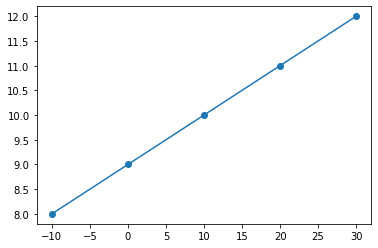

mean value 10.0
mean value2 10.0
range value 40
range value2 4


In [90]:
#Creations

from matplotlib import pyplot as plt

value = [-10, 0, 10, 20, 30]
value2 = [8, 9, 10, 11, 12]

plt.plot(value, value2, marker='o')
plt.show()

print('mean value', mean(value))
print('mean value2', mean(value2))
print('range value', data_range(value))
print('range value2', data_range(value2))

In [91]:
print('variance',variance(value))
print('variance', variance(value2))
print('std', standard_deviation(value))
print('std', standard_deviation(value2))

variance 250.0
variance 2.5
std 15.811388300841896
std 1.5811388300841898


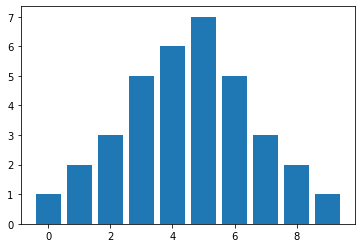

3.5
3.0
2.1213203435596424
4.5


In [92]:
a = [1,2,3,5,6,7,5,3,2,1]
plt.bar(range(len(a)), a)
plt.show()
print(mean(a))
print(median(a))
print(standard_deviation(a))
print(variance(a))

In [93]:
print('----------------1 std 68 percent data lies:------------')
print(3.5+2.121)
print(3.5-2.121)
print('----------------2 std: 95 percent data lies------------')
print(3.5 + 4.242)
print(3.5 - 4.242)

----------------1 std 68 percent data lies:------------
5.621
1.379
----------------2 std: 95 percent data lies------------
7.742
-0.742


0.9814954576223639


Text(0, 0.5, 'b values')

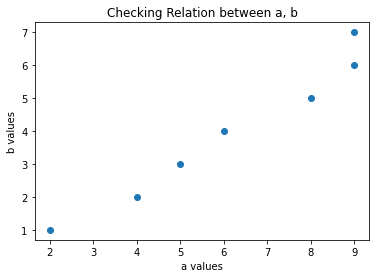

In [94]:
#checking any relation ship between a and b variables
a = [2,4,5,6,8,9,9]
b = [1,2,3,4,5,6,7]

print(correlation(a,b))
plt.scatter(a,b)
plt.title('Checking Relation between a, b')
plt.xlabel('a values')
plt.ylabel('b values')

# Realworld

In [95]:
fileName = "forestfires.csv"
data = pd.read_csv(fileName, delimiter=',')


In [96]:
data.head()

,X,Y,Month,Day,Ffmc,Dmc,Dc,Isi,Temp,Rh,Wind,Rain,Area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [125]:
temp = data.Temp.values
rain = data.Rain.values
wind = data.Wind.values
print('-----correlation------')
print(correlation(temp,rain))
print('-----covarience-------')
print(covariance(temp, rain))
print('-----correlation------')
print(correlation(temp, wind))

-----correlation------
0.06949054662170358
-----covarience-------
0.1194211536443105
-----correlation------
-0.22711622037066953


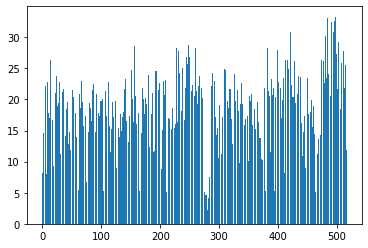

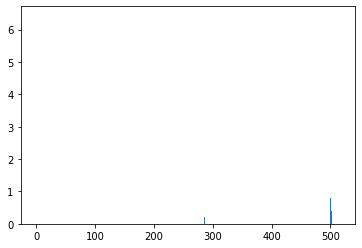

In [124]:
plt.bar(range(len(temp)), temp)
plt.show()
plt.bar(range(len(rain)), rain)
plt.show()

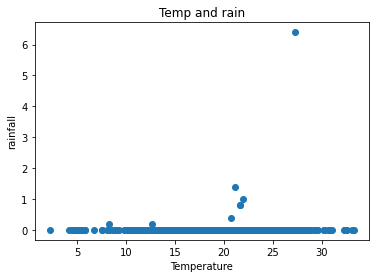

In [99]:
plt.scatter(temp, rain)
plt.title('Temp and rain')
plt.xlabel('Temperature')
plt.ylabel('rainfall')
plt.show()

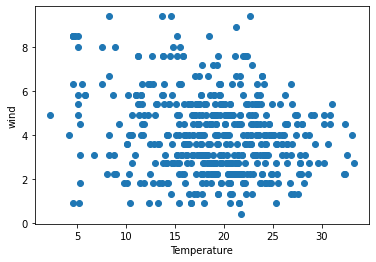

-0.22711622037066953
result is no correlation


In [126]:
plt.scatter(temp, wind)
plt.xlabel('Temperature')
plt.ylabel('wind')
plt.show()
print(correlation(temp, wind))
print('result is no correlation')

In [101]:
print(data)

     X  Y Month  Day  Ffmc    Dmc     Dc   Isi  Temp  Rh  Wind  Rain   Area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


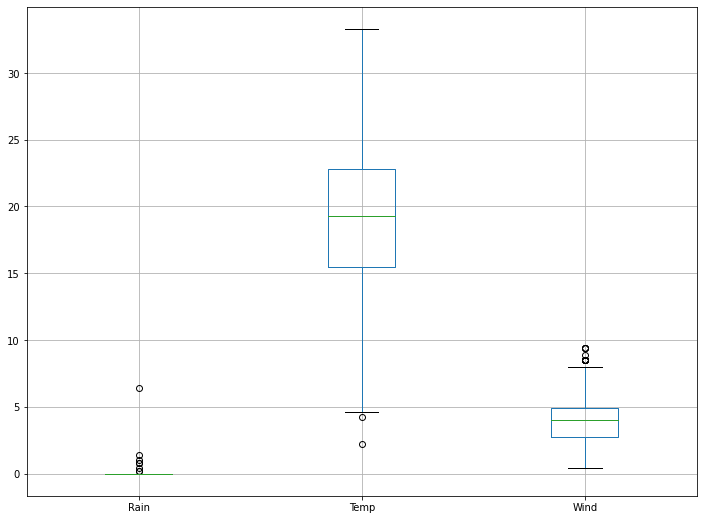

In [127]:
data.boxplot(column=['Rain','Temp', 'Wind'], figsize=(12,9))

In [103]:
data.describe()

,X,Y,Ffmc,Dmc,Dc,Isi,Temp,Rh,Wind,Rain,Area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [128]:
from typing import List, Tuple

def checkoutlier(xs: List[float]) -> Tuple:
    iqr1 = 1.5* (iqr(xs))
    q1 = (quantile(xs, 0.25)) - iqr1
    q2 = (quantile(xs, 0.75)) + iqr1
    return q1,q2


print();print(checkoutlier(temp));print()
print('outliers in rain')
print(checkoutlier(rain));print()
print('outliers in wind')
print(checkoutlier(wind))


(4.549999999999999, 33.75)

outliers in rain
(0.0, 0.0)

outliers in wind
(-0.6000000000000001, 8.200000000000001)


In [152]:

Outlier_temp_index = [i
                      for i,tem in enumerate(temp)
                      if (tem <= 6) or (tem >= 30)]
print(Outlier_temp_index)

Outlier_wind_index = [i
                     for i, w in enumerate(wind)
                     if (w >= 8.20) or (w <= -0.60)]

print(Outlier_wind_index)


temp_good = [x
            for i,x in enumerate(temp_fixed)
            if i not in Outlier_temp_index
            if i not in Outlier_wind_index
            ]

wind_good = [x
            for i, x in enumerate(wind_fixed)
            if i not in Outlier_wind_index
            if i not in Outlier_temp_index
            ]


print(checkoutlier(temp_good))

[28, 61, 104, 165, 176, 196, 211, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 379, 394, 421, 463, 464, 465, 480, 481, 483, 484, 485, 491, 492, 494, 496, 497, 498]
[142, 162, 168, 273, 276, 277, 278, 279, 281, 411, 469, 475, 506]
(6.0500000000000025, 32.85)


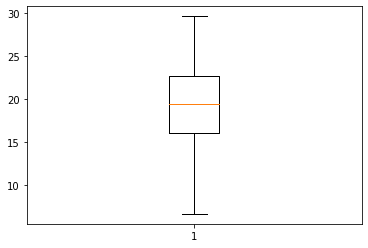

In [153]:
plt.boxplot(temp_good)
plt.show()

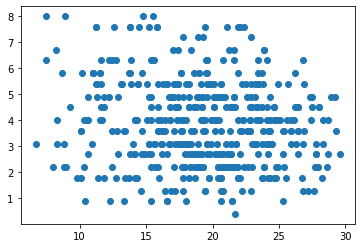

-0.15176738001400267


In [154]:
plt.scatter(temp_good, wind_good)
plt.show()
print(correlation(temp_good, wind_good));

#  

-0.04748418702402552

mean of value 44.625
mean of value2 61.25
median of value 42.0
median of value2 37.5



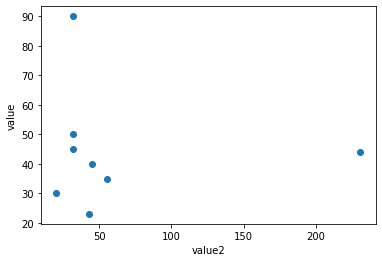

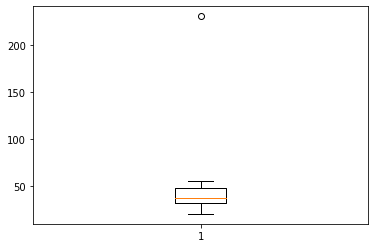

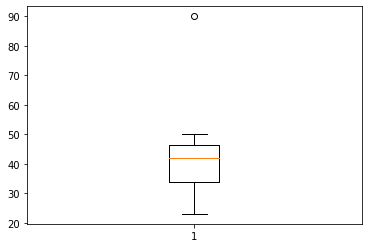

In [109]:
value = [30,40,35,45,23,44,50, 90]
value2 = [20,45,55,32,43,231,32,32]
print(correlation(value, value2));print()
print('mean of value', mean(value))
print('mean of value2', mean(value2))
print('median of value', median(value))
print('median of value2', median(value2));print()
plt.scatter(value2, value)
plt.xlabel("value2")
plt.ylabel("value")
plt.show()

plt.boxplot(value2)
plt.show()

plt.boxplot(value)
plt.show()

In [110]:
outlier = value.index(90)
outlier1 = value2.index(231)

num_value_good = [x for i, x in enumerate(value)
                    if i!=outlier]
num_value2_good = [x for i, x in enumerate(value2)
                     if i!=outlier1]

mean num_value_good 38.142857142857146
mean num_value2_good 37.0
median num_value_good 40
medain num_value2_good 32

-0.1808980645631524


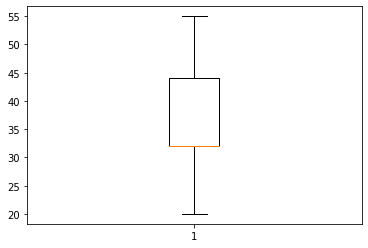

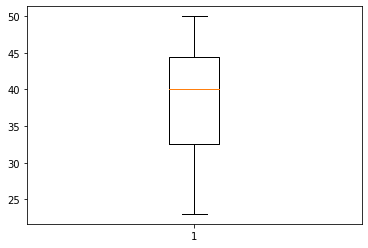

(7.5, 67.5)

In [111]:
print('mean num_value_good', mean(num_value_good))
print('mean num_value2_good', mean(num_value2_good))
print('median num_value_good', median(num_value_good))
print('medain num_value2_good', median(num_value2_good));print()
print(correlation(num_value_good, num_value2_good))
plt.boxplot(num_value2_good)
plt.show()
plt.boxplot(num_value_good)
plt.show()

checkoutlier(num_value_good)